# Import

In [69]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

import arviz as az
import pymc3 as pm

# Chapter 02

https://github.com/pymc-devs/resources/blob/master/Rethinking_2/Chp_02.ipynb

## Subchapter

### Code 2.1

In [4]:
ways = np.array([0, 3, 8, 9, 0])
ways/sum(ways)

array([0.  , 0.15, 0.4 , 0.45, 0.  ])

### Code 2.2

In [12]:
stats.binom.pmf(6, p=0.5, n=9)

0.16406250000000006

### Code 2.3

In [20]:
#define grid
p_grid = np.linspace(0, 1, 20)

#define prior
prior = np.repeat(1, 20)

#compute likelihood at each value in grid
likelihood = stats.binom.pmf(5, n=9, p=p_grid)

#compute product of likelihood and prior
unstd_posterior = likelihood * prior

#standardize the posterior, so it sums to 1
posterior = unstd_posterior / sum(unstd_posterior)

### Code 2.4

In [60]:
def get_posterior(points, use_prior='1'):
    #define grid
    p_grid = np.linspace(0, 1, points)

    #define prior
    if use_prior == '1':
        prior = np.repeat(1, points)
    else: 
        prior = [0 if i < 0.5 else 1 for i in p_grid]
        prior = np.exp(-5*np.abs(p_grid - 0.5))

    #compute likelihood at each value in grid
    likelihood = stats.binom.pmf(6, n=9, p=p_grid)

    #compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    #standardize the posterior, so it sums to 1
    posterior = unstd_posterior / sum(unstd_posterior)
    
    return p_grid, posterior

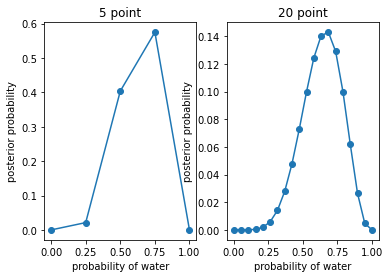

In [67]:
fig, ax = plt.subplots(1, 2)

for idx, points in enumerate([5, 20]):
    p_grid, posterior = get_posterior(points)
    ax[idx].plot(p_grid, posterior, marker='o')
    ax[idx].set_xlabel('probability of water')
    ax[idx].set_ylabel('posterior probability')
    ax[idx].set_title('{} point'.format(points))
    
plt.show()

### Code 2.5

In [62]:
prior = [0 if i < 0.5 else 1 for i in p_grid]
prior = np.exp(-5*np.abs(p_grid - 0.5))

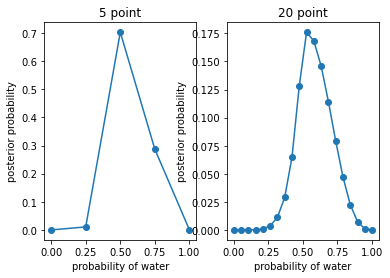

In [68]:
fig, ax = plt.subplots(1, 2)

for idx, points in enumerate([5, 20]):
    p_grid, posterior = get_posterior(points, use_prior='2')
    ax[idx].plot(p_grid, posterior, marker='o')
    ax[idx].set_xlabel('probability of water')
    ax[idx].set_ylabel('posterior probability')
    ax[idx].set_title('{} point'.format(points))
    
plt.show()

### Code 2.6

In [70]:
data = np.repeat((0, 1), (3, 6))
with pm.Model() as normal_aproximation:
    p = pm.Uniform("p", 0, 1)  # uniform priors
    w = pm.Binomial("w", n=len(data), p=p, observed=data.sum())  # binomial likelihood
    mean_q = pm.find_MAP()
    std_q = ((1 / pm.find_hessian(mean_q, vars=[p])) ** 0.5)[0]

# display summary of quadratic approximation
print('  Mean, Standard deviation\np {:.2}, {:.2}'.format(mean_q["p"], std_q[0]))


  Mean, Standard deviation
p 0.67, 0.16


### Code 2.7

In [73]:
# analytical calculation